In [1]:
# Tugas Kecil 2 IF2211 Strategi Algoritma
# Lyora Felicya
# 13520073
# Convex Hull dengan Divide and Conquer
# Tujuan    : Menemukan kumpulan titik 'terluar' yang membentuk convex hull

# Array untuk menyimpan solusi
arrConvexHull = []

# Mencari determinan 
# Digunakan untuk menentukan posisi titik P3 terhadap garis yang dibentuk P1 dan P2
def determinant(p1, p2, p3):
    return (p1[0]*p2[1] + p3[0]*p1[1] + p2[0]*p3[1]) - (p3[0]*p2[1] + p2[0]*p1[1] + p1[0]*p3[1])

# Mencari titik ekstrim dari sekumpulan titik
def findMinMax(arrTitik):
    pMin = arrTitik[0]
    pMax = arrTitik[0]

    for point in arrTitik:
        if(point[0] <= pMin[0]):
            pMin = point
        if(point[0] >= pMax[0]):
            pMax = point

    return pMin, pMax

# Mengembalikan jarak dari sebuah titik p3 ke garis yang dibentuk p1 dan pn
def pointToLineDistance(p1, pn, p3): 
    return abs((p3[1] - p1[1]) * (pn[0] - p1[0]) - (pn[1] - p1[1]) * (p3[0] - p1[0]))

# Membagi sekumpulan titik ke dalam 2 bagian
def divideSection(points,min_X,max_X):
    leftHull = []
    rightHull = []

    for point in points:
        if(point != min_X) and (point != max_X):
            if (determinant(min_X,max_X,point) > 0):
                leftHull.append(point)
            if (determinant(min_X,max_X,point) < 0):
                rightHull.append(point)

    return leftHull,rightHull

# Memproses convex hull kiri
def leftConvexHull(p1, pn, arrKiri):
    if (len(arrKiri)!= 0):
        # Mengambil titik dengan jarak terjauh
        arrKiri.sort(key=lambda x:pointToLineDistance(p1, pn, x), reverse=True)
        maxPoint = arrKiri[0]
        arrConvexHull.append(maxPoint)
        arrKiri.remove(maxPoint)

        # Mengulangi proses pembentukan convex hull kiri hingga tidak terdapat titik lagi di sebelah kiri
        titikKiri1,_ = divideSection(arrKiri,p1,maxPoint)
        titikKiri2,_ = divideSection(arrKiri,maxPoint,pn)
        leftConvexHull(p1,maxPoint,titikKiri1)
        leftConvexHull(maxPoint,pn,titikKiri2)

# Memproses convex hull kanan
def rightConvexHull(p1, pn, arrKanan):
    if (len(arrKanan)!= 0):
        # Mengambil titik dengan jarak terjauh
        arrKanan.sort(key=lambda x:pointToLineDistance(p1, pn, x), reverse=True)
        maxPoint = arrKanan[0]
        arrConvexHull.append(maxPoint)
        arrKanan.remove(maxPoint)

        # Mengulangi proses pembentukan convex hull kanan hingga tidak terdapat titik lagi di sebelah kanan
        _,titikKanan1 = divideSection(arrKanan, p1, maxPoint)
        _,titikKanan2 = divideSection(arrKanan, maxPoint, pn)
        rightConvexHull(p1,maxPoint,titikKanan1)
        rightConvexHull(maxPoint,pn,titikKanan2)

# Mengurutkan titik agar dapat digambar berbentuk poligon
def makePolygon(arr):
    leftmost, rightmost = findMinMax(arr)
    arrLeft, arrRight =  divideSection(arr, leftmost, rightmost)

    arrLeft.sort(key=lambda k: [k[0], k[1]])
    arrRight.sort(key=lambda k: [k[0], k[1]], reverse=True)

    return [leftmost]+arrLeft+[rightmost]+arrRight+[leftmost]

# Inisiasi convex hull pertama kali
def convexHull(arrTitik):
    # Mengosongkan arrConvexHull yang merupakan variabel global
    arrConvexHull.clear() 

    # Mengambil titik ekstrim sebagai titik awal yang akan membentuk convex hull
    P1, Pn = findMinMax(arrTitik)
    arrConvexHull.append(P1)
    arrConvexHull.append(Pn)

    # Tahap pertama dari divide and conquer, membagi sekumpulan titik S menjadi 2 bagian
    arrKiri, arrKanan = divideSection(arrTitik, P1, Pn)

    # Divide and Conquer
    leftConvexHull(P1,Pn,arrKiri)
    rightConvexHull(P1,Pn,arrKanan)

    # Mengembalikan titik yang dihasilkan setelah digabung dengan convex hull kiri dan kanan
    arrPolygon = arrConvexHull
    arrPolygon = makePolygon(arrPolygon)
    return(arrPolygon)


In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets 
data = datasets.load_iris() 
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


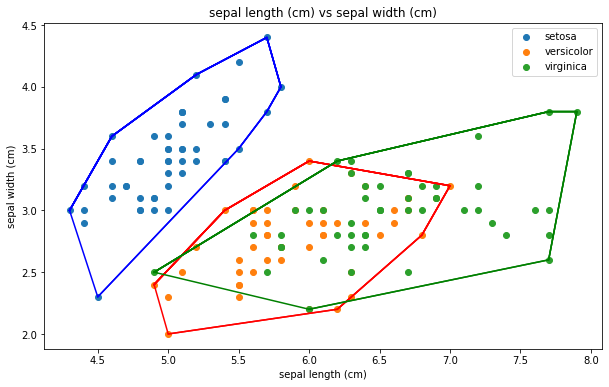

In [7]:
#visualisasi hasil ConvexHull (implementasi sendiri)
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
colors = ['b','r','g']

#kolom yang ingin digunakan
a = 0
b = 1

plt.title(str(data.feature_names[a]) + ' vs ' + str(data.feature_names[b]))
plt.xlabel(data.feature_names[a])
plt.ylabel(data.feature_names[b])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[a,b]].values
    arrBucket = bucket.tolist() # Mengubah ndarray menjadi array of points (list)

    hull = convexHull(arrBucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    absis = []
    ordinat = []
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for j in range(len(hull)):
        point = hull[j]
        absis.append(point[0])
        ordinat.append(point[1])
        plt.plot(absis, ordinat, colors[i])
plt.legend()